In [1]:
!pip install lightgbm

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier , BaggingClassifier
import lightgbm as lgb
from sklearn.metrics import classification_report

!pip install xgboost
from xgboost import XGBClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/content/Titanic_train.csv")          #looking at train and test data we have marked embarked as Y data
test = pd.read_csv("/content/Titanic_test.csv")

In [4]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [7]:
train.drop(columns=['Name','Survived','SibSp','Parch','Fare','Cabin','Ticket'],inplace=True)

In [8]:
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
test.describe(include=object)

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [11]:
test.drop(columns=['Name','SibSp','Parch','Fare','Ticket','Cabin'],inplace=True)

In [12]:
train

,PassengerId,Pclass,Sex,Age,Embarked
0,1,3,male,22.0,S
1,2,1,female,38.0,C
2,3,3,female,26.0,S
3,4,1,female,35.0,S
4,5,3,male,35.0,S
...,...,...,...,...,...
886,887,2,male,27.0,S
887,888,1,female,19.0,S
888,889,3,female,NaN,S
889,890,1,male,26.0,C


In [13]:
test

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,male,34.5,Q
1,893,3,female,47.0,S
2,894,2,male,62.0,Q
3,895,3,male,27.0,S
4,896,3,female,22.0,S
...,...,...,...,...,...
413,1305,3,male,NaN,S
414,1306,1,female,39.0,C
415,1307,3,male,38.5,S
416,1308,3,male,NaN,S


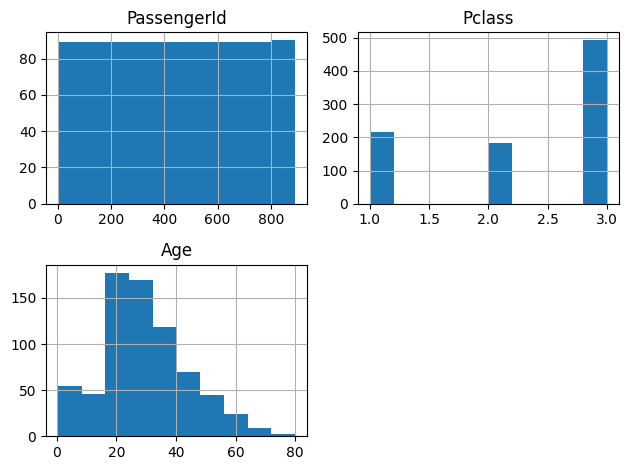

In [14]:
train.hist()
plt.tight_layout()

<Axes: >

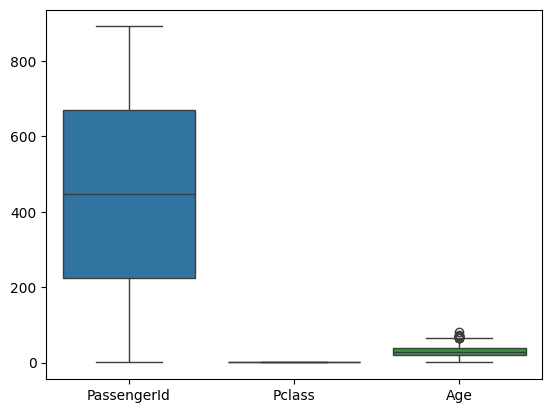

In [15]:
import seaborn as sns
sns.boxplot(train)

In [16]:
print(train.duplicated().sum())
test.duplicated().sum()

0


0

In [17]:
train.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
Embarked         2
dtype: int64

In [18]:
(177/891)*100

19.865319865319865

In [19]:
median1 = train['Age'].median()

In [20]:
train['Age'].fillna(median1 , inplace = True)

In [21]:
test.isna().sum()

PassengerId     0
Pclass          0
Sex             0
Age            86
Embarked        0
dtype: int64

In [22]:
median2 = test['Age'].median()
test['Age'].fillna(median2 , inplace = True)

In [23]:
train

,PassengerId,Pclass,Sex,Age,Embarked
0,1,3,male,22.0,S
1,2,1,female,38.0,C
2,3,3,female,26.0,S
3,4,1,female,35.0,S
4,5,3,male,35.0,S
...,...,...,...,...,...
886,887,2,male,27.0,S
887,888,1,female,19.0,S
888,889,3,female,28.0,S
889,890,1,male,26.0,C


In [24]:
test

,PassengerId,Pclass,Sex,Age,Embarked
0,892,3,male,34.5,Q
1,893,3,female,47.0,S
2,894,2,male,62.0,Q
3,895,3,male,27.0,S
4,896,3,female,22.0,S
...,...,...,...,...,...
413,1305,3,male,27.0,S
414,1306,1,female,39.0,C
415,1307,3,male,38.5,S
416,1308,3,male,27.0,S


In [25]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked', ylabel='count'>

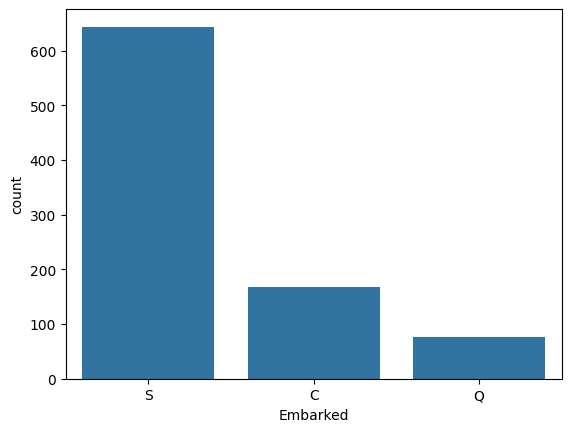

In [26]:
sns.countplot(x=train['Embarked'])

In [27]:
x_train = train.iloc[:,0:4]
y_train = train.iloc[:,4]
x_test = test.iloc[:,0:4]
y_test = test.iloc[:,4]

In [28]:
import pandas as pd
x_train = pd.get_dummies(x_train, columns=['Sex'], dtype=int)
x_test = pd.get_dummies(x_test, columns=['Sex'], dtype=int)


In [29]:

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


In [30]:
def prediction(model):
  model.fit(x_train,y_train)
  ypred = model.predict(x_test)
  print('Train Accuracy: ',model.score(x_train,y_train))
  print('Test Accuracy: ',model.score(x_test,y_test))
  print(classification_report(y_test,ypred))#get confusion matrix

In [31]:
prediction(lgb.LGBMClassifier())


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000496 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Info] Start training from score -0.324646
[LightGBM] [Info] Start training from score -6.099197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [32]:
prediction(XGBClassifier())

Train Accuracy:  0.9730639730639731
Test Accuracy:  0.5813397129186603
              precision    recall  f1-score   support

           0       0.37      0.10      0.16       102
           1       0.17      0.13      0.15        46
           2       0.64      0.84      0.73       270

    accuracy                           0.58       418
   macro avg       0.39      0.36      0.34       418
weighted avg       0.52      0.58      0.52       418



In [33]:
params = {
    'n_estimators' : [140,150,160], # randomly select no. of trees/models
    'learning_rate' : [0.2,0.3,0.4], # alpha between 0 to 1
    'max_depth' : [2,3,4]
}

In [34]:
model_lgb = GridSearchCV(lgb.LGBMClassifier(),param_grid = params,verbose = 1)
model_lgb.fit(x_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

GridSearchCV(estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [140, 150, 160]},
             verbose=1)

In [35]:
model_lgb.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 140}

In [36]:
prediction(lgb.LGBMClassifier(n_estimators=140, max_depth=2, learning_rate=0.2))      #80,1,0.1

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Info] Start training from score -0.324646
[LightGBM] [Info] Start training from score -6.099197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [37]:
model_xgb = GridSearchCV(XGBClassifier(),param_grid = params,verbose = 1)
model_xgb.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.3, 0.4],
                         'max_depth': [2, 3, 4],
                         'n_estimators': [140, 150, 160]},
             verbose=1)

In [38]:
model_xgb.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 150}

In [39]:
prediction(XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150))

Train Accuracy:  0.8080808080808081
Test Accuracy:  0.6339712918660287
              precision    recall  f1-score   support

           0       0.47      0.17      0.25       102
           1       0.00      0.00      0.00        46
           2       0.66      0.92      0.77       270
           3       0.00      0.00      0.00         0

    accuracy                           0.63       418
   macro avg       0.28      0.27      0.25       418
weighted avg       0.54      0.63      0.55       418



# **Comparative analysis**

**LGB Classifier before :  0.60
            and   after  :  0.61**

**XGB Classifier before:0.58  and after:0.63**

# **Visualisation**

In [40]:
from xgboost import plot_tree
import matplotlib.pyplot as plt

In [41]:
model = XGBClassifier(learning_rate=0.2, max_depth=2, n_estimators=150)
model.fit(x_train ,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

<Axes: >

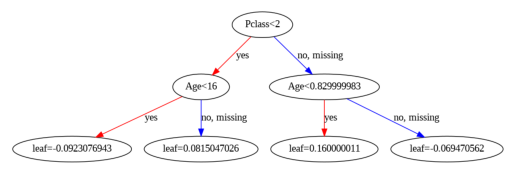

In [42]:
plot_tree(model)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 328
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 5
[LightGBM] [Info] Start training from score -1.668380
[LightGBM] [Info] Start training from score -2.448539
[LightGBM] [Info] Start training from score -0.324646
[LightGBM] [Info] Start training from score -6.099197
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

<Axes: >

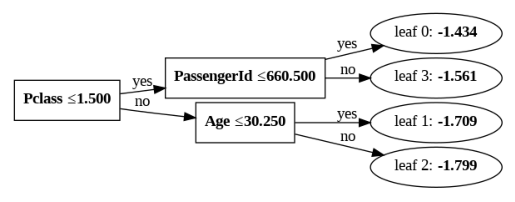

In [43]:
from lightgbm import plot_tree

model2 = lgb.LGBMClassifier(n_estimators=140, max_depth=2, learning_rate=0.2)
model2.fit(x_train, y_train)

plot_tree(model2)

**we can observe  In XGBoost, trees grow depth-wise while in LightGBM, trees grow leaf-wise which is the fundamental difference between the two frameworks.**

**Advantage and disadvantage of XGBM**
XGBoost is a fast and efficient ensemble learning algorithm that has been widely applied in various domains. However, XGBoost's classification effect in the case of imbalanced data is often not ideal, which can affect its performance.

**Advantage and disadvantage of LGBM**
LGBM has also faster and higher efficiency and better accuracy than other boosting algorithm. It has compatibility with large dataset too ,only problem here is issue with overfitting. it can easily overfit small data.



**Practical implications :**

Light GBM is very fast when compared to XGBOOST and is a much better approach when dealing with large datasets. This turns out to be a huge advantage when you are working on large datasets in limited time competitions.